<a href="https://colab.research.google.com/github/rvishakhs/Deep_Learning/blob/Fundamentals/CNN_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to computer Vision



In [1]:
# Get the data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2025-01-25 10:21:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   110MB/s    in 1.0s    

2025-01-25 10:21:56 (110 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
import os
# Walkthrough pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [3]:
!ls -la pizza_steak


total 16
drwxr-xr-x 4 root root 4096 Jan 25 10:21 .
drwxr-xr-x 1 root root 4096 Jan 25 10:21 ..
drwxr-xr-x 4 root root 4096 Jan 25 10:21 test
drwxr-xr-x 4 root root 4096 Jan 25 10:21 train


In [4]:
# Get the class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
#class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [5]:
#Let's Visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def View_random_images(target_dir, target_class):
  # Setup the target directory (we'll view images from there)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read and Display the image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (339, 512, 3)


array([[[134, 112,  75],
        [136, 114,  77],
        [138, 116,  79],
        ...,
        [ 88, 100, 100],
        [ 86,  98,  98],
        [ 84,  96,  96]],

       [[132, 110,  73],
        [133, 111,  74],
        [135, 113,  76],
        ...,
        [ 86,  98,  98],
        [ 84,  96,  96],
        [ 82,  94,  94]],

       [[132, 112,  77],
        [132, 112,  77],
        [132, 112,  77],
        ...,
        [ 85,  97,  97],
        [ 83,  95,  95],
        [ 82,  94,  94]],

       ...,

       [[173, 195, 192],
        [172, 194, 191],
        [177, 196, 194],
        ...,
        [ 11,  10,  15],
        [ 11,  10,  15],
        [ 11,  10,  15]],

       [[171, 196, 192],
        [172, 194, 191],
        [177, 196, 194],
        ...,
        [ 11,  10,  15],
        [ 11,  10,  15],
        [ 11,  10,  15]],

       [[171, 196, 192],
        [172, 194, 191],
        [176, 195, 193],
        ...,
        [ 11,  10,  15],
        [ 11,  10,  15],
        [ 11,  10,  15]]], dtype=uint8)
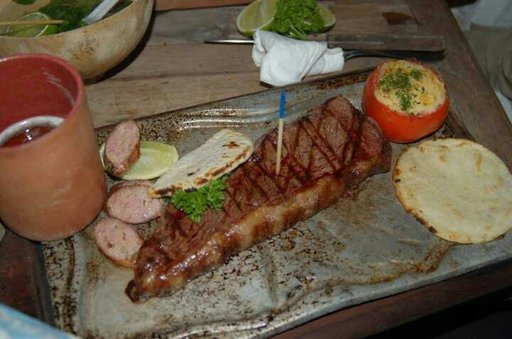

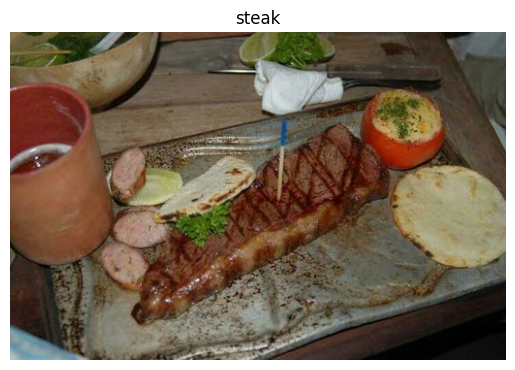

In [6]:
View_random_images(target_dir='pizza_steak/train/', target_class='steak')

### Build A CNN Network
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our data into CNN



In [7]:
# Import libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (Get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = 'pizza_steak/train' # Updated path
test_dir = 'pizza_steak/test'  # Updated path


# Import data from the directrories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode='binary')

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode='binary')

# Build the CNN Model
Model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
Model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = Model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.6129 - loss: 0.6435 - val_accuracy: 0.8060 - val_loss: 0.4454
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.7704 - loss: 0.4735 - val_accuracy: 0.8160 - val_loss: 0.4029
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.8061 - loss: 0.4436 - val_accuracy: 0.8260 - val_loss: 0.3856


# Let's break our Model


Image shape: (288, 512, 3)
Image shape: (512, 512, 3)


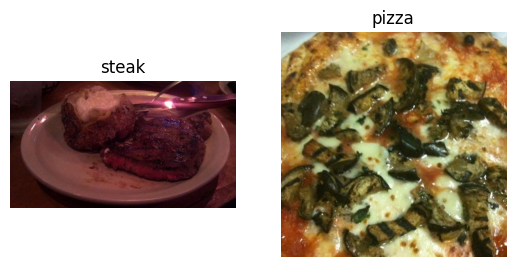

In [8]:
# Visualize our data
plt.figure()
plt.subplot(1,2,1)
steak_img = View_random_images('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = View_random_images('pizza_steak/train/', 'pizza')

In [9]:
# Preprocessing the data
train_data = 'pizza_steak/train'
test_data = 'pizza_steak/test'


In [10]:
!nvidia-smi

Sat Jan 25 10:22:54 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              34W /  70W |   1703MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all millions of images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images or more might not fit into the memory of your processor
2. Trying to learn the patterns in 10,000 images in one hit could result our model can't have a good learning curve



In [11]:
# Create train and test data genarators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Setup paths to our data directories
train_dir = 'pizza_steak/train' # Updated path
test_dir = 'pizza_steak/test'  # Updated path

In [13]:
# Load in our data from directories and turn them into batches
training_data = train_datagen.flow_from_directory(directory=train_dir, # Directory we need to load our data
                                               target_size=(224,224), # Output data dimensions converts all data into this dimentions
                                               batch_size=32, # This is the number of batchs needed(32 in most of the cases)
                                               class_mode='binary', # Binary because we dealing with binary classification
                                               seed=42) # Custom seed size

testing_data = test_datagen.flow_from_directory(directory=test_dir, # Directory we need to load our data
                                               target_size=(224,224), # Output data dimensions converts all data into this dimentions
                                               batch_size=32, # This is the number of batchs needed(32 in most of the cases)
                                               class_mode='binary', # Binary because we dealing with binary classification
                                               seed=42) # Custom seed size

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
# Get a sample of our training data
images, labels = next(training_data) # Get the 'next' batch of images/labels
#images, labels = train_data.__next__() # Get the 'next' batch of images/labels

len(images), len(labels)

(32, 32)

In [15]:
images[3]

array([[[0.40784317, 0.27450982, 0.227451  ],
        [0.454902  , 0.3137255 , 0.2509804 ],
        [0.45882356, 0.3137255 , 0.24313727],
        ...,
        [0.6       , 0.42352945, 0.34901962],
        [0.5921569 , 0.41176474, 0.34901962],
        [0.59607846, 0.4156863 , 0.3529412 ]],

       [[0.39607847, 0.2627451 , 0.21568629],
        [0.45882356, 0.31764707, 0.25490198],
        [0.46274513, 0.31764707, 0.24705884],
        ...,
        [0.5921569 , 0.427451  , 0.34117648],
        [0.5882353 , 0.42352945, 0.3372549 ],
        [0.5921569 , 0.427451  , 0.34117648]],

       [[0.3921569 , 0.25882354, 0.21176472],
        [0.45882356, 0.31764707, 0.25490198],
        [0.4666667 , 0.32156864, 0.2509804 ],
        ...,
        [0.59607846, 0.43137258, 0.3372549 ],
        [0.5921569 , 0.427451  , 0.33333334],
        [0.5921569 , 0.427451  , 0.33333334]],

       ...,

       [[0.20784315, 0.07058824, 0.09411766],
        [0.20784315, 0.07058824, 0.09411766],
        [0.20784315, 0

In [16]:
labels[3]

0.0

### Creating a CNN Model (BaseLine)

In [17]:
# Make the creating our model a littile easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [18]:
# Creat the model
model_2 = Sequential([
    Conv2D(filters=10,  # Filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3,  # The size of the sliding window going across an input
           strides=1,  # The size of the step the sliding window takes across an input
           padding='valid', # if 'same', output shape is same as input shape, if 'valid', output shape get's compressed
           activation='relu',
           input_shape=(224,224,3)),  # Input layer specify the input shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')  # Output layer depends upon the problem we are working on if it's binary only one
])



In [19]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [20]:
# Fit the data
len(train_data), len(test_data)

history_2 = model_2.fit(training_data,  # This include combination of lables and data
                        epochs=5,  # Number of iterations, training need to be done
                        steps_per_epoch=len(train_data),
                        #validation_data=test_data,
                        #validation_steps=len(test_data)
                        )

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5861 - loss: 1.6788
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.5427 - loss: 0.6842
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.7212 - loss: 0.5561
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8054 - loss: 0.4556
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8070 - loss: 0.4492


In [21]:
#|history_data = pd.DataFrame(history_2.history)
#history_data.head()

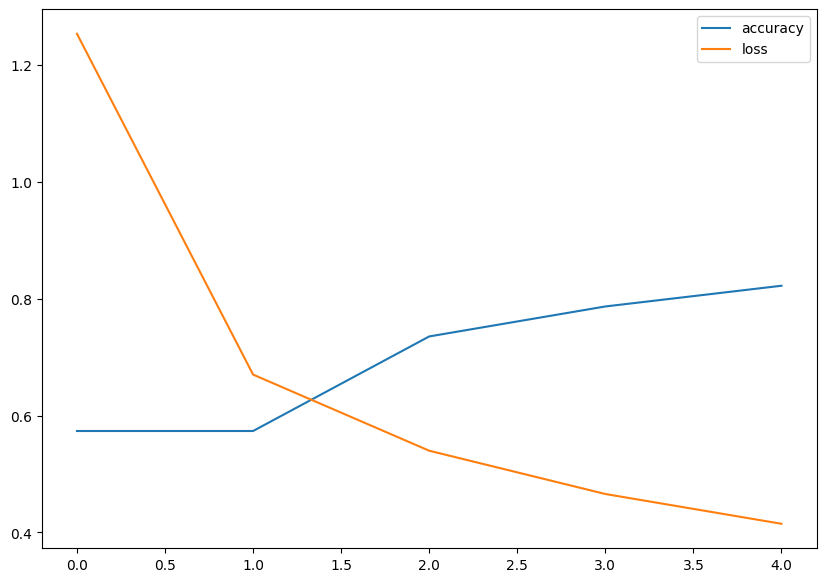

In [22]:
# Evaluate our model

import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7));

In [23]:
#pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [24]:
# Create a Plotting function to plot training and validation curves seperately

def plot_loss_curves(history):
  '''
  Returns separate loss curves for training and validation metrics
  '''

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label= 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label= 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()



In [25]:
#plot_loss_curves()

In [26]:
# Creating another Model which we expecting perform better

Model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu',),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu',),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compiling the Model
Model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [28]:
len(training_data), len(testing_data)

(47, 16)

In [29]:
history_3 = Model_3.fit(training_data,
                        epochs=5,
                        steps_per_epoch=len(training_data),
                        validation_data=testing_data,
                        validation_steps=len(testing_data))

Epoch 1/5
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6454 - loss: 0.6361

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - accuracy: 0.6485 - loss: 0.6332 - val_accuracy: 0.8180 - val_loss: 0.4111
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.7980 - loss: 0.4466 - val_accuracy: 0.8640 - val_loss: 0.3560
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.8330 - loss: 0.3812 - val_accuracy: 0.8220 - val_loss: 0.3621


In [30]:
# Create ImageDataGenerator Training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


In [31]:
# Import data and augment it from training directory
print("Augmented Training Data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented train data batches
print("Non-Augmented Training Data: ")
train_data_non_augmented = train_datagen.flow_from_directory(directory=train_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='binary',
                                                              shuffle=False)
IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-Augmented Test Data: ")
test_data_non_augmented = test_datagen.flow_from_directory(directory=test_dir,
                                                          target_size=IMG_SIZE,
                                                          batch_size=32,
                                                          class_mode='binary',
                                                          shuffle=False)

Augmented Training Data: 
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data: 
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data: 
Found 500 images belonging to 2 classes.


In [32]:
# Get the sample data batches

images, labels = next(train_data_non_augmented);
augmented_img, augmented_labels = next(train_data_augmented);



showing image 30


(-0.5, 223.5, 223.5, -0.5)

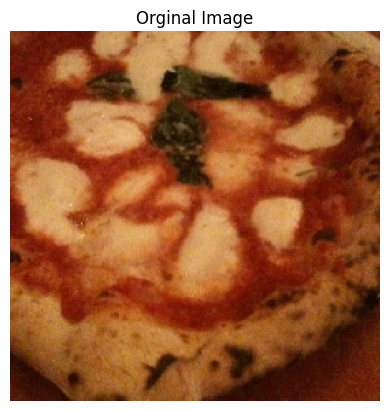

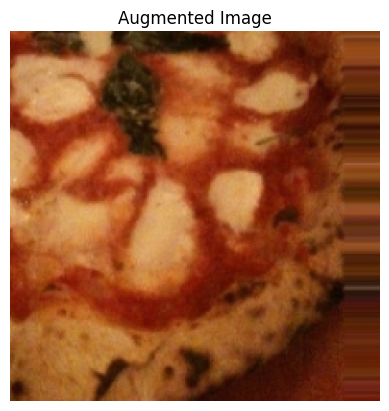

In [33]:
# Show orginal image and augmented image

import random
random_number = random.randint(0,32)

print(f"showing image {random_number}")
plt.imshow(images[random_number])
plt.title(f'Orginal Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_img[random_number])
plt.title(f'Augmented Image')
plt.axis(False)

In [34]:
# Creating another Model which we expecting perform better

Model_4 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu',),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu',),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compiling the Model
Model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = Model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data_non_augmented,
                        validation_steps=len(test_data_non_augmented))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.5163 - loss: 0.7186 - val_accuracy: 0.5140 - val_loss: 0.6830
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 352ms/step - accuracy: 0.4210 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - accuracy: 0.5102 - loss: 0.7020 - val_accuracy: 0.6120 - val_loss: 0.6880


In [35]:
# Create a function that load and pre_process our Image
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image file and turns it into a tensor with an added dimension
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the readed file into tensors
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image which fits to our model
  img = img/255.

  return img


### Multi Class classification

In [36]:
# import lib

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2025-01-25 10:32:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 142.251.188.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  29.3MB/s    in 9.2s    

2025-01-25 10:32:34 (53.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [37]:
import os
# Walkthrough pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 10 directories and 0 imag

In [41]:
# Seting up the training and test directories

train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [42]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') ]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


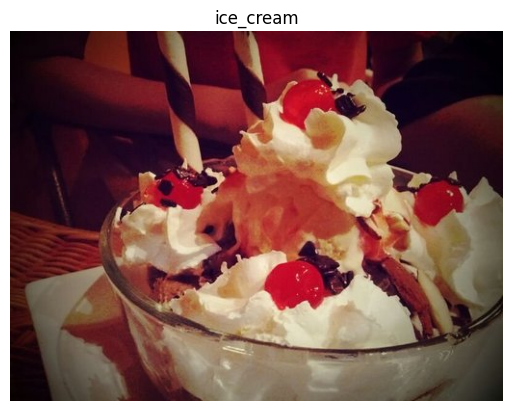

In [44]:
import random
random_img = View_random_images(target_dir=train_dir,
                                target_class=random.choice(class_names))

In [52]:
# Preprocess the image data for feeding into the model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_data_img = ImageDataGenerator(rescale=1/255.)
test_data_img = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches

train_data1 = train_data_img.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')
test_data1 = test_data_img.flow_from_directory(test_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [55]:
# Creata a baseline model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Creating the model
multi_model = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
multi_model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy'])

# Fit the model
history_multi = multi_model.fit(train_data1,
                                epochs=5,
                                steps_per_epoch=len(train_data1),
                                validation_data=test_data1,
                                validation_steps=len(test_data1)
                                )

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.1790 - loss: 2.2170 - val_accuracy: 0.2700 - val_loss: 2.0040
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - accuracy: 0.3428 - loss: 1.8822 - val_accuracy: 0.3424 - val_loss: 1.8667
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 113ms/step - accuracy: 0.4862 - loss: 1.5317 - val_accuracy: 0.3200 - val_loss: 1.9672
